In [25]:
# what is in this folder


In [6]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

ModuleNotFoundError: No module named 'pandas'

In [26]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()


ModuleNotFoundError: No module named 'pandas'

In [2]:
import pandas as pd

In [4]:
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [5]:
# 이제 대충 그림을 그려봅시다
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


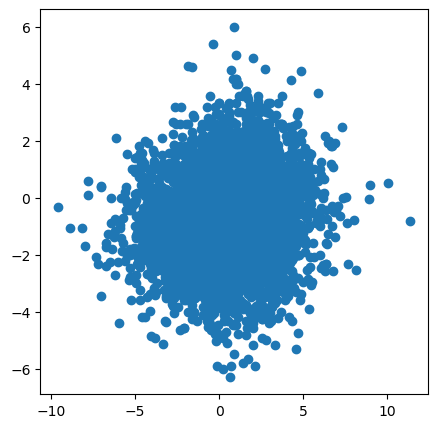

In [7]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

In [11]:
from scipy.stats import pearsonr

### new figure
# Assuming cnts DataFrame is already prepared
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

# Log transformation
log_clip_enrichment = np.log2(cnts['clip_enrichment'])
log_rden_change = np.log2(cnts['rden_change'])

# Calculate Pearson correlation coefficient
r_value, _ = pearsonr(log_clip_enrichment, log_rden_change)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))

# Scatter plot with improved aesthetics
ax.scatter(log_clip_enrichment, log_rden_change, s=10, alpha=0.5, color='black')

# Set axis labels
ax.set_xlabel('LIN28A CLIP enrichment (log$_2$)')
ax.set_ylabel('Ribosome density change (log$_2$)')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Add title and correlation coefficient
title = 'CLIP and ribosome footprinting upon Lin28a knockdown'
ax.set_title(title, fontsize=10, loc='left')
ax.text(0.95, 0.05, f'r = {r_value:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()

/home/ssoyik7239/miniconda3/envs/dnaseq/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ssoyik7239/miniconda3/envs/dnaseq/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


ValueError: array must not contain infs or NaNs

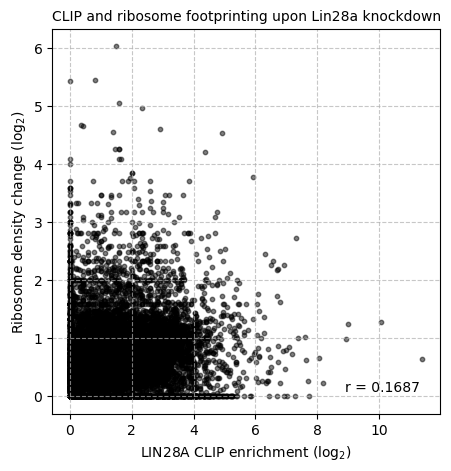

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming cnts DataFrame is already prepared
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

# Remove rows with NaN or inf values before log transformation
cnts.replace([np.inf, -np.inf], np.nan, inplace=True)
cnts.dropna(subset=['clip_enrichment', 'rden_change'], inplace=True)

# Log transformation

# counts 데이터가 +1 안되어있어서 잘리는 것이 주요 에러???
log_clip_enrichment = np.log2(cnts['clip_enrichment']+1)
log_rden_change = np.log2(cnts['rden_change']+1)

# Remove rows with NaN or inf values after log transformation
log_clip_enrichment.replace([np.inf, -np.inf], np.nan, inplace=True)
log_rden_change.replace([np.inf, -np.inf], np.nan, inplace=True)
log_clip_enrichment.dropna(inplace=True)
log_rden_change.dropna(inplace=True)

# Calculate Pearson correlation coefficient
r_value, _ = pearsonr(log_clip_enrichment, log_rden_change)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))

# Scatter plot with improved aesthetics
ax.scatter(log_clip_enrichment, log_rden_change, s=10, alpha=0.5, color='black')

# Set axis labels
ax.set_xlabel('LIN28A CLIP enrichment (log$_2$)')
ax.set_ylabel('Ribosome density change (log$_2$)')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Add title and correlation coefficient
title = 'CLIP and ribosome footprinting upon Lin28a knockdown'
ax.set_title(title, fontsize=10, loc='left')
ax.text(0.95, 0.05, f'r = {r_value:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()


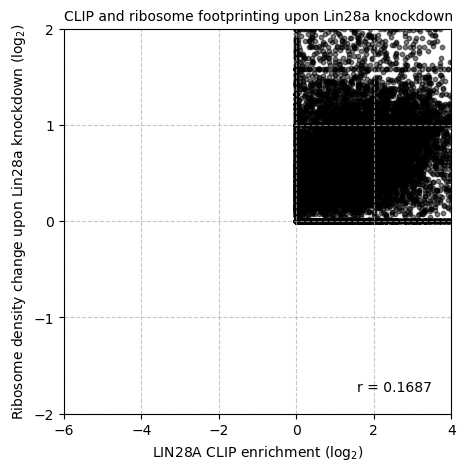

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming cnts DataFrame is already prepared and cleaned
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

# Remove rows with NaN or inf values before log transformation
cnts.replace([np.inf, -np.inf], np.nan, inplace=True)
cnts.dropna(subset=['clip_enrichment', 'rden_change'], inplace=True)

# Log transformation
log_clip_enrichment = np.log2(cnts['clip_enrichment'] +1 )
log_rden_change = np.log2(cnts['rden_change'] +1)

# Remove rows with NaN or inf values after log transformation
log_clip_enrichment.replace([np.inf, -np.inf], np.nan, inplace=True)
log_rden_change.replace([np.inf, -np.inf], np.nan, inplace=True)
log_clip_enrichment.dropna(inplace=True)
log_rden_change.dropna(inplace=True)

# Calculate Pearson correlation coefficient
r_value, _ = pearsonr(log_clip_enrichment, log_rden_change)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))

# Scatter plot with improved aesthetics
ax.scatter(log_clip_enrichment, log_rden_change, s=10, alpha=0.5, color='black')

# Set axis limits
ax.set_xlim(-6, 4)
ax.set_ylim(-2, 2)

# Set axis labels
ax.set_xlabel('LIN28A CLIP enrichment (log$_2$)')
ax.set_ylabel('Ribosome density change upon Lin28a knockdown (log$_2$)')

# Set tick marks
ax.set_xticks(np.arange(-6, 5, 2))
ax.set_yticks(np.arange(-2, 3, 1))

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Add title and correlation coefficient
title = 'CLIP and ribosome footprinting upon Lin28a knockdown'
ax.set_title(title, fontsize=10, loc='left')
ax.text(0.95, 0.05, f'r = {r_value:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()


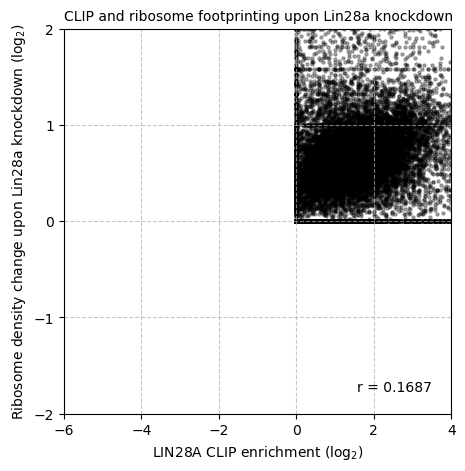

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load and prepare the data
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

# Remove rows with NaN or inf values before log transformation
cnts.replace([np.inf, -np.inf], np.nan, inplace=True)
cnts.dropna(subset=['clip_enrichment', 'rden_change'], inplace=True)

# Log transformation
log_clip_enrichment = np.log2(cnts['clip_enrichment'] +1)
log_rden_change = np.log2(cnts['rden_change'] +1)

# Remove rows with NaN or inf values after log transformation
valid_indices = ~log_clip_enrichment.isin([np.nan, np.inf, -np.inf]) & ~log_rden_change.isin([np.nan, np.inf, -np.inf])
log_clip_enrichment = log_clip_enrichment[valid_indices]
log_rden_change = log_rden_change[valid_indices]

# Calculate Pearson correlation coefficient
r_value, _ = pearsonr(log_clip_enrichment, log_rden_change)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))

# Scatter plot with improved aesthetics
ax.scatter(log_clip_enrichment, log_rden_change, s=5, alpha=0.3, color='black')

# Set axis limits
ax.set_xlim(-6, 4)
ax.set_ylim(-2, 2)

# Set axis labels
ax.set_xlabel('LIN28A CLIP enrichment (log$_2$)')
ax.set_ylabel('Ribosome density change upon Lin28a knockdown (log$_2$)')

# Set tick marks
ax.set_xticks(np.arange(-6, 5, 2))
ax.set_yticks(np.arange(-2, 3, 1))

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Add title and correlation coefficient
title = 'CLIP and ribosome footprinting upon Lin28a knockdown'
ax.set_title(title, fontsize=10, loc='left')
ax.text(0.95, 0.05, f'r = {r_value:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.show()
